In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [87]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_std = self.standardize(X)
        cov_matrix = self.compute_covariance_matrix(X_std)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    def transform(self, X):
        X_std = self.standardize(X)
        return np.dot(X_std, self.components)

    def standardize(self, X):
        return (X - self.mean) / np.std(X, axis=0)

    def compute_covariance_matrix(self, X):
        n_samples = X.shape[0]
        cov_matrix = np.zeros((X.shape[1], X.shape[1]))
        for i in range(X.shape[1]):
            for j in range(X.shape[1]):
                cov_matrix[i, j] = np.sum((X[:, i] - np.mean(X[:, i])) * (X[:, j] - np.mean(X[:, j]))) / (n_samples - 1)
        return cov_matrix

In [98]:
bc = load_iris()
x = bc.data
y = bc.target

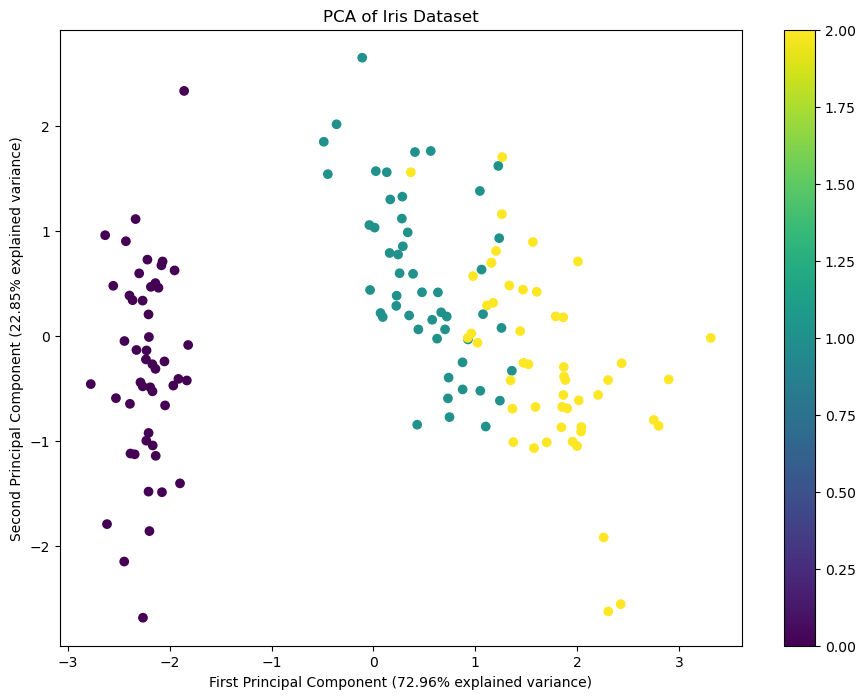

In [99]:
pca = PCA(n_components=2)
pca.fit(x)
X_pca = pca.transform(x)

plt.figure(figsize=(11, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio[0]:.2%} explained variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio[1]:.2%} explained variance)')
plt.title('PCA of Iris Dataset')
plt.colorbar(scatter)
plt.show()

In [92]:
feature_names = bc.feature_names
num_components = pca.components.shape[1]

for i in range(num_components):
    component = pca.components[i]
    sorted_features = np.argsort(np.abs(component))[::-1]  # Sort features by absolute contribution
    print(i+1)
    for j in sorted_features:
        print(f"{feature_names[j]}: {(component[j]):.3f}")

1
mean texture: -0.234
mean radius: 0.219
2
mean radius: 0.104
mean texture: -0.060
